In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
df=pd.read_csv(r"C:\Users\goura\Downloads\CWML\insurance.csv")

In [17]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.corr()

C:\Users\goura\AppData\Local\Temp\ipykernel_14404\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [137]:
df.skew()

C:\Users\goura\AppData\Local\Temp\ipykernel_14404\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

In [26]:
X_iv=df.iloc[:,:5]
Y_dv=df["expenses"]

In [27]:
X_iv

,age,sex,bmi,children,smoker
0,19,female,27.9,0,yes
1,18,male,33.8,1,no
2,28,male,33.0,3,no
3,33,male,22.7,0,no
4,32,male,28.9,0,no
...,...,...,...,...,...
1333,50,male,31.0,3,no
1334,18,female,31.9,0,no
1335,18,female,36.9,0,no
1336,21,female,25.8,0,no


In [28]:
Y_iv

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [40]:
X_trans=pd.get_dummies(X_iv)

In [42]:
myLrModel=sm.OLS(Y_dv,X_trans).fit()


In [43]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [44]:
sats=linear_rainbow(myLrModel)

In [45]:
sats

(1.1232141726180565, 0.06705795577698172)

In [46]:
if sats[0]>.05:
    print("the p value is",round(sats[1],4),">0.05 so reject the null")
else:
     print("the p value is",round(sats[1],4),"<0.05 so accept the null")

the p value is 0.0671 >0.05 so reject the null


<function matplotlib.pyplot.show(close=None, block=None)>

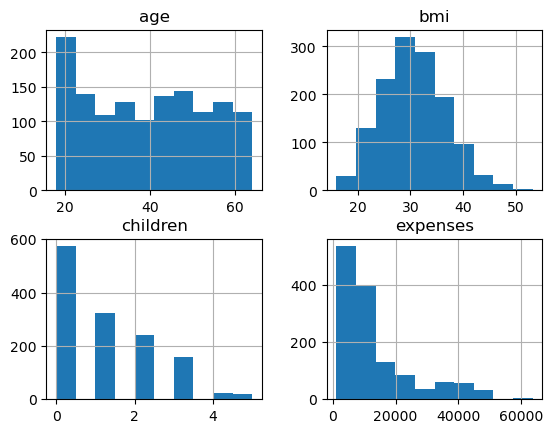

In [47]:
df.hist()
plt.show

In [48]:
trainer=LinearRegression()

In [50]:
lr=trainer.fit(X_trans,Y_dv)

In [51]:
lr.coef_

array([   257.71917355,    322.45161148,    474.60201834,     64.34063733,
          -64.34063733, -11911.15632944,  11911.15632944])

In [52]:
lr.intercept_

-208.34172119922732

In [54]:
y_prd=lr.predict(X_trans)

In [56]:
y_prd

array([25660.2195035 ,  3828.5729225 ,  7097.00740552, ...,
        4482.25217444,  1676.19680762, 36871.36672651])

In [57]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [59]:
mean_squared_error(y_prd,Y_dv)

36674108.73456073

In [71]:
r2_score(Y_dv,y_prd)

0.7497378438127859

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.9,0,1,0,0,1
1,18,33.8,1,0,1,1,0
2,28,33.0,3,0,1,1,0
3,33,22.7,0,0,1,1,0
4,32,28.9,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0
1334,18,31.9,0,1,0,1,0
1335,18,36.9,0,1,0,1,0
1336,21,25.8,0,1,0,1,0


In [125]:
id=(52,56.2,2,1,0,0,1)

In [126]:
t=np.asarray(id)

In [128]:
t_r=t.reshape(1,-1)

In [133]:
t_pred=lr.predict(t_r)

C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [135]:
print(f"The insutance amount for above input={t_pred[0]}")

The insutance amount for above input=8506.067884129048
